In [32]:
import numpy as np

# Load the data
dataset = "NYCBike1"
data_path = fr"D:\omer\ST-SSL\data\{dataset}\test.npz"
data = np.load(data_path)
y_train = data['y']
num_samples, _, num_nodes, dim = y_train.shape
total_samples = num_samples * num_nodes * dim
## calculate the number of samples with value above 5
num_above_5 = np.sum(y_train > 5)

# print the results
print(f"Dataset: {dataset}")
print(f"Total samples: {total_samples}")
print(f"Samples above 5: {num_above_5}")
print(y_train.shape)

Dataset: NYCBike1
Total samples: 221184
Samples above 5: 73559
(864, 1, 128, 2)


In [1]:
import numpy as np

# Load the data
dataset = "NYCTaxi"
data_path = fr"D:\omer\ST-SSL\data\{dataset}\train.npz"
data = np.load(data_path)
x_train = data['x']

# Determine the shape of the data for iterations
num_samples, num_time_steps, num_nodes, num_channels = x_train.shape

# Initialize a list to store the percentage of values below 5 for each node
low_demand_percentage = np.zeros(num_nodes)

# Initialize an array to store the average demand for each node
average_demand = np.zeros(num_nodes)

# Calculate the percentage of values below 5 and the average demand for each node across all samples and time steps
for node in range(num_nodes):
    # Count the number of values below 5 in this node across all samples and time steps
    low_demand_count = np.count_nonzero(x_train[:, :, node, :] < 5)
    # Calculate the percentage of values below 5
    total_count = num_samples * num_time_steps * num_channels
    low_demand_percentage[node] = (low_demand_count / total_count) * 100

    # Calculate the average demand for this node
    average_demand[node] = np.mean(x_train[:, :, node, :])

# Define a threshold for considering a node as a 'zero node'
threshold = 90  # 90% of the time the demand should be below 5

# Count the nodes that are mostly low demand
low_demand_nodes_count = np.sum(low_demand_percentage >= threshold)

# Find indices of nodes with the highest demand
indices_of_highest_demand = np.argsort(-average_demand)[:20]  # Get top 5 nodes with highest demand

print(f"data.shape: {x_train.shape}")
print(f"Number of nodes: {num_nodes}")
print(f"Number of nodes with demand staying below 5 for at least 90% of the time: {low_demand_nodes_count}")
print(f"Indices of nodes with the highest demand: {indices_of_highest_demand}")


data.shape: (1912, 35, 200, 2)
Number of nodes: 200
Number of nodes with demand staying below 5 for at least 90% of the time: 99
Indices of nodes with the highest demand: [ 45  86  66  67  65  87  44 108  46  64 107  24  43  23  42  68  63 109
 129 128]


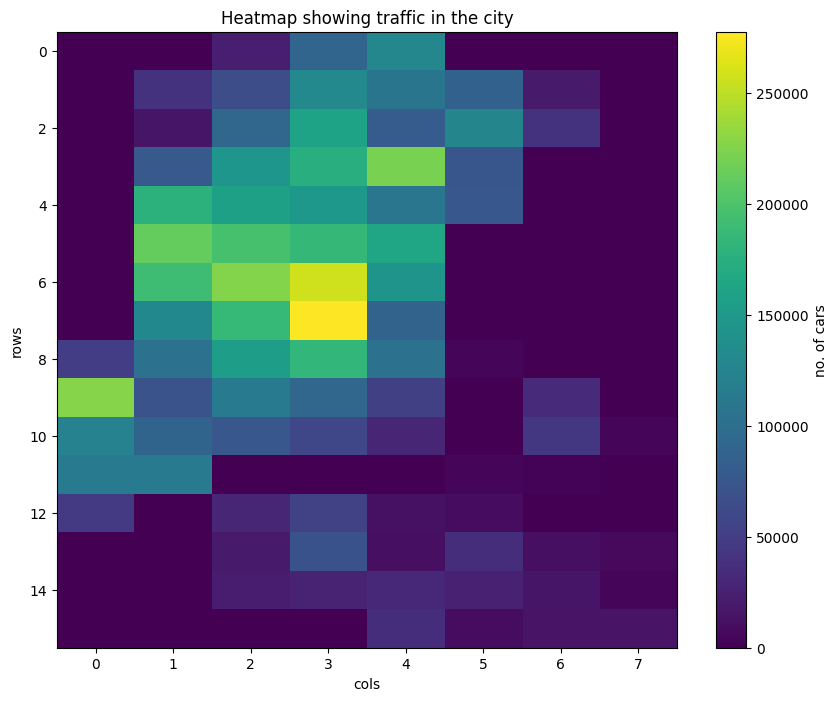

In [21]:
import numpy as np
dataset = "NYCBike1"
data_path = fr"D:\omer\ST-SSL\data\{dataset}\train.npz"
data = np.load(data_path)
y_train = data["y"]
train_avg = np.sum(y_train, axis=(0, 3)).squeeze(0).reshape(16, 8)

# inout_train_avg = (in_train_avg + out_train_avg)/2
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.imshow(train_avg, cmap='viridis', aspect='auto')
plt.colorbar(label='no. of cars')
plt.title('Heatmap showing traffic in the city')
plt.xlabel('cols')
plt.ylabel('rows')
plt.show()

In [1]:
with torch.no_grad():
    for i, (data, _) in enumerate(train_loader):
        data = data[:, 0, :, :].squeeze(1)
        B, N, D = data.size()
        data = data.view(B, args["rows"], args["cols"], D)
        plt.figure(figsize=(10, 8))
        plt.imshow(data[2, :, :, 1].cpu().numpy(), cmap='viridis', aspect='auto')
        plt.colorbar(label='no. of cars')
        plt.title('Heatmap showing traffic in the city')
        plt.xlabel('cols')
        plt.ylabel('rows')
        plt.show()

NameError: name 'torch' is not defined

In [ ]:
import sys
sys.path.append('.')
sys.path.append('..')
from lib.dataloader import get_dataloader
import torch
import matplotlib.pyplot as plt

# start_epoch = args.start_epoch
# num_epochs = args.num_epochs

args = {"data_dir": r"data", "dataset": "NYCTaxi", "batch_size": 1, "test_batch_size": 32, "rows": 20, "cols": 10, "num_epochs": 100}
dataloader = get_dataloader(
    data_dir=args['data_dir'], 
    dataset=args['dataset'], 
    batch_size=args['batch_size'], 
    test_batch_size=args['test_batch_size'],
    scalar_type='Standard'
)
train_loader = dataloader['train']
test_loader = dataloader['test']
val_loader = dataloader['val']




!!Scaling is off!!


data['x_train'].shape:  (1912, 35, 200, 2) (1912, 1, 200, 2) 

!!train shuffle is false!!




len(data_train): 3814
y_train.shape: (3814, 1, 1024, 2)
in_train.shape: (3814, 1, 1024)
in_train_avg.shape: (32, 32)


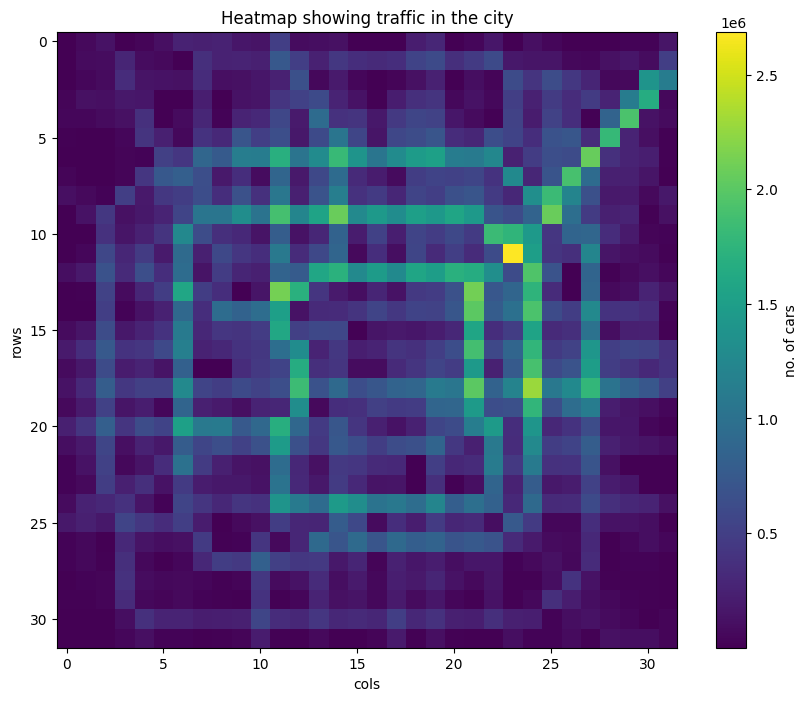

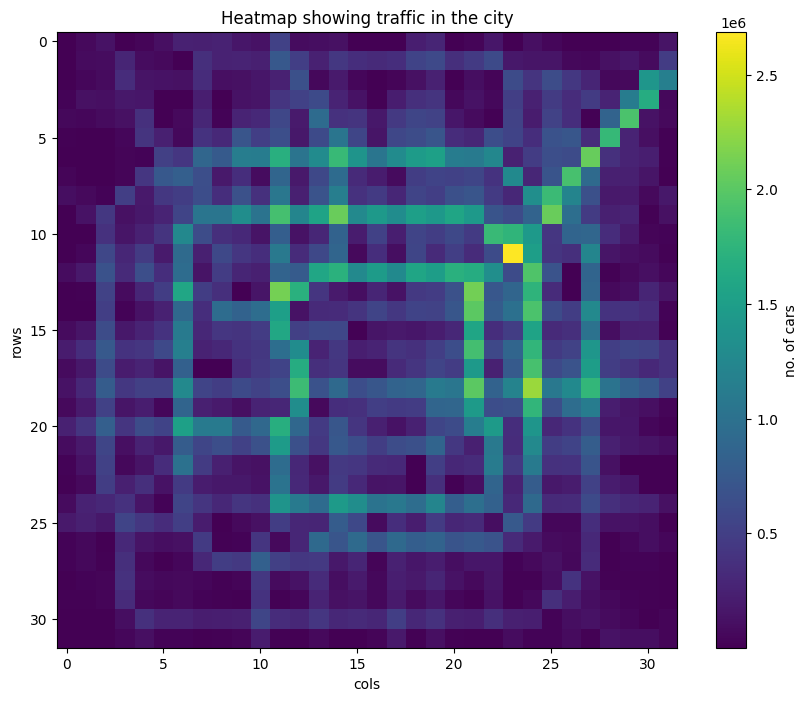

In [ ]:
import numpy as np
x_train = np.load(r'E:\estudy\ST-SSL\code\ST-SSL\data\BJTaxi\train.npz')["x"]
y_train = np.load(r'E:\estudy\ST-SSL\code\ST-SSL\data\BJTaxi\train.npz')["y"]
print(f"len(data_train): {len(x_train)}")
print(f"y_train.shape: {y_train.shape}")
in_train = y_train[:, :, :, 0]
out_train = y_train[:, :, :, 1]
print(f"in_train.shape: {in_train.shape}")
in_train_avg = np.sum(in_train, axis=0).squeeze(0).reshape(32, 32)
out_train_avg = np.sum(out_train, axis=0).squeeze(0).reshape(32, 32)
print(f"in_train_avg.shape: {in_train_avg.shape}")

inout_train_avg = (in_train_avg + out_train_avg)/2
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.imshow(in_train_avg, cmap='viridis', aspect='auto')
plt.colorbar(label='no. of cars')
plt.title('Heatmap showing traffic in the city')
plt.xlabel('cols')
plt.ylabel('rows')
plt.show()
plt.figure(figsize=(10, 8))
plt.imshow(inout_train_avg, cmap='viridis', aspect='auto')
plt.colorbar(label='no. of cars')
plt.title('Heatmap showing traffic in the city')
plt.xlabel('cols')
plt.ylabel('rows')
plt.show()

inout_train_avg_pd.shape: (20, 10)


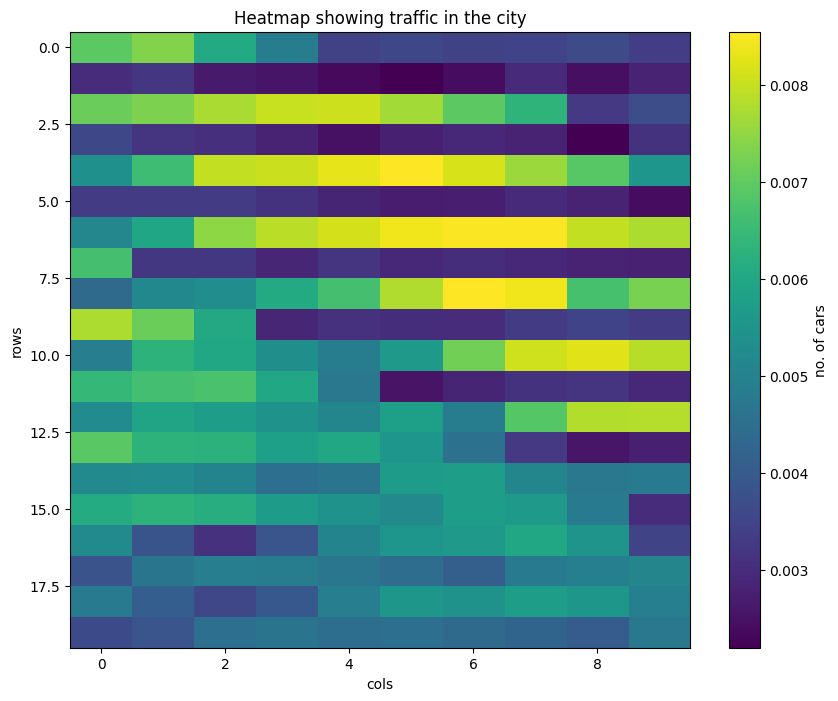

In [ ]:
in_train_avg_flat = in_train_avg.flatten()
inout_train_avg_pd = np.power(inout_train_avg, 0.1)
inout_train_avg_pd = inout_train_avg_pd/np.sum(inout_train_avg_pd, axis=(0, 1))

print(f"inout_train_avg_pd.shape: {inout_train_avg_pd.shape}")
# np.save(r'E:\estudy\ST-SSL\code\ST-SSL\data\NYCTaxi\grid_pd.npy', inout_train_avg_pd)
plt.figure(figsize=(10, 8))
plt.imshow(inout_train_avg_pd, cmap='viridis', aspect='auto')
plt.colorbar(label='no. of cars')
plt.title('Heatmap showing traffic in the city')
plt.xlabel('cols')
plt.ylabel('rows')
plt.show()

In [ ]:

a = np.random.choice([0, 1], (1,))
print(a==1)

[ True]


In [ ]:
grid_pd = np.load(r"E:\estudy\ST-SSL\code\ST-SSL\data\NYCTaxi\grid_pd.npy")

In [ ]:
d = {9:1, 2:3}
3 in d
for j in range(1, 1):
    print(j)
    
a = 'asd'
a[2]
a = [1, 2, 3]
b = a.copy()
b[0]=10
# print(a, b)
strs=["x"]
print(len(strs))
if len(strs)==1:
    print([strs])
# a=list(a)
# # a.remove("s")
# a.pop(1)
# print(a)

1
[['x']]


In [ ]:

class Solution:
    def groupAnagrams(self, strs):
        out = []
        def isAnagram(a, b):
            b = list(b)
            if len(a) != len(b):
                return False
            for i in range(len(a)):
                if a[i] not in b:
                    return False
                else:
                    b.remove(a[i])
            return True
        temp=[]
        for i in range(len(strs)):
            if strs[i] in temp:
                continue
            # if len(strs)==1:
                # return [strs]
            out_i = [strs[i]]
            
            for j in range(i+1, len(strs)):
                # print(i, j, len(strs))
                # if strs[j] in temp:
                    # continue
                if isAnagram(strs[i], strs[j]):
                    out_i.append(strs[j])
                    temp.append(strs[j])
                    # strs.remove(strs[j])
            out.append(out_i)
        return out
s = Solution()
# s.groupAnagrams(["eat","tea","tan","ate","nat","bat"])
s.groupAnagrams(["","",""])
# s.groupAnagrams(["x"])

[['', '', '']]

In [ ]:
from collections import defaultdict

my_dict = defaultdict(lambda: None)

In [ ]:
from collections import defaultdict
d=defaultdict(int)
for i in range(3):
    d[i]+=1
print(d)

defaultdict(<class 'int'>, {0: 1, 1: 1, 2: 1})


In [ ]:
torch.randint(50, 100, (1,)).item()
ctxt_indices = np.random.choice((20, 10), size=33, replace=False)

ValueError: Cannot take a larger sample than population when 'replace=False'

200


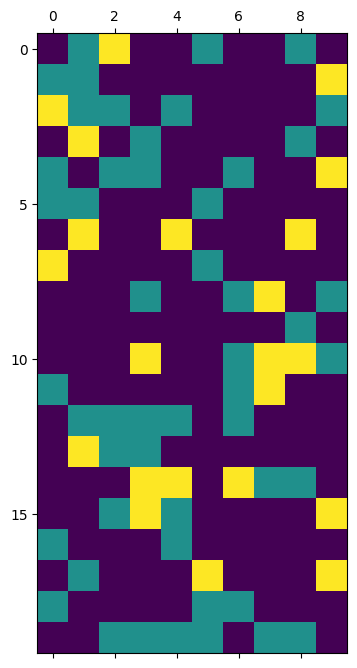

50
22


In [ ]:
inout_train_avg
inout_train_avg_pd

inout_train_avg_pd_flat = inout_train_avg_pd.flatten()
inout_train_avg_flat = inout_train_avg.flatten()
print(inout_train_avg_flat.size)
inout_ctxt = np.random.choice(inout_train_avg_flat.size, size=50, replace=False, p=inout_train_avg_pd_flat)
# print(inout_ctxt)
mask = np.zeros(inout_train_avg_flat.shape)
mask[inout_ctxt] = 1
# print(np.reshape(mask, (20, 10)))

inout_train_avg_pd_flat[inout_ctxt] = 0 ## set probability for the chosen context nodes to 0
inout_train_avg_pd_flat /= inout_train_avg_pd_flat.sum() ## normalize the probabilities again

inout_trgt = np.random.choice(inout_train_avg_flat.size, size=22, replace=False, p=inout_train_avg_pd_flat)
mask[inout_trgt] = 2

plt.matshow(np.reshape(mask, (20, 10)), cmap='viridis')
plt.show()
# print(np.reshape(mask, (20, 10)))
print(sum(mask == 1))
print(sum(mask == 2))

In [ ]:
print("len(train_loader):", len(train_loader))
for i, (data, target) in enumerate(train_loader):
    print(data.shape, target.shape)

len(train_loader): 1912
torch.Size([1, 35, 200, 2]) torch.Size([1, 1, 200, 2])
torch.Size([1, 35, 200, 2]) torch.Size([1, 1, 200, 2])
torch.Size([1, 35, 200, 2]) torch.Size([1, 1, 200, 2])
torch.Size([1, 35, 200, 2]) torch.Size([1, 1, 200, 2])
torch.Size([1, 35, 200, 2]) torch.Size([1, 1, 200, 2])
torch.Size([1, 35, 200, 2]) torch.Size([1, 1, 200, 2])
torch.Size([1, 35, 200, 2]) torch.Size([1, 1, 200, 2])
torch.Size([1, 35, 200, 2]) torch.Size([1, 1, 200, 2])
torch.Size([1, 35, 200, 2]) torch.Size([1, 1, 200, 2])
torch.Size([1, 35, 200, 2]) torch.Size([1, 1, 200, 2])
torch.Size([1, 35, 200, 2]) torch.Size([1, 1, 200, 2])
torch.Size([1, 35, 200, 2]) torch.Size([1, 1, 200, 2])
torch.Size([1, 35, 200, 2]) torch.Size([1, 1, 200, 2])
torch.Size([1, 35, 200, 2]) torch.Size([1, 1, 200, 2])
torch.Size([1, 35, 200, 2]) torch.Size([1, 1, 200, 2])
torch.Size([1, 35, 200, 2]) torch.Size([1, 1, 200, 2])
torch.Size([1, 35, 200, 2]) torch.Size([1, 1, 200, 2])
torch.Size([1, 35, 200, 2]) torch.Size([1

visualizing nodes through time

In [ ]:
import sys
sys.path.append('.')
sys.path.append('..')
from lib.dataloader import get_dataloader
import torch
import matplotlib.pyplot as plt

# start_epoch = args.start_epoch
# num_epochs = args.num_epochs

args = {"data_dir": r"data", "dataset": "NYCTaxi", "batch_size": 1, "test_batch_size": 32, "rows": 20, "cols": 10, "num_epochs": 100}
dataloader = get_dataloader(
    data_dir=args['data_dir'], 
    dataset=args['dataset'], 
    batch_size=args['batch_size'], 
    test_batch_size=args['test_batch_size'],
    scalar_type='Standard'
)
train_loader = dataloader['train']
test_loader = dataloader['test']
val_loader = dataloader['val']




!!Scaling is off!!


data['x_train'].shape:  (1912, 35, 200, 2) (1912, 1, 200, 2) 

!!train shuffle is false!!




len(data_train): 1912
y_train.shape: (1912, 1, 200, 2)
in_train.shape: (1912, 200)


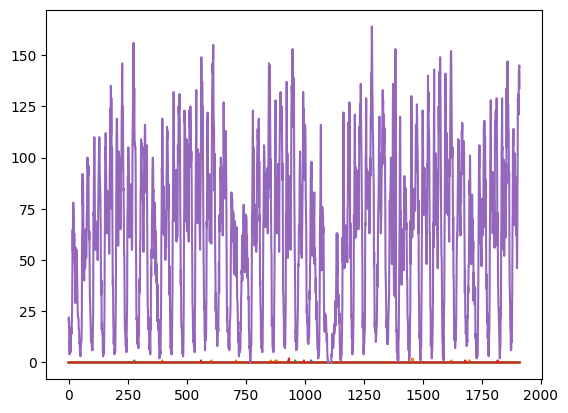

In [ ]:
import numpy as np
x_train = np.load(r'E:\estudy\ST-SSL\code\ST-SSL\data\NYCTaxi\train.npz')["x"]
y_train = np.load(r'E:\estudy\ST-SSL\code\ST-SSL\data\NYCTaxi\train.npz')["y"]
print(f"len(data_train): {len(x_train)}")
print(f"y_train.shape: {y_train.shape}")
in_train = y_train[:, :, :, 0]

in_train = np.squeeze(in_train, axis=1)
print(f"in_train.shape: {in_train.shape}")
import matplotlib.pyplot as plt
plt.plot(in_train[0:1912, [16, 17, 18, 19, 20]])

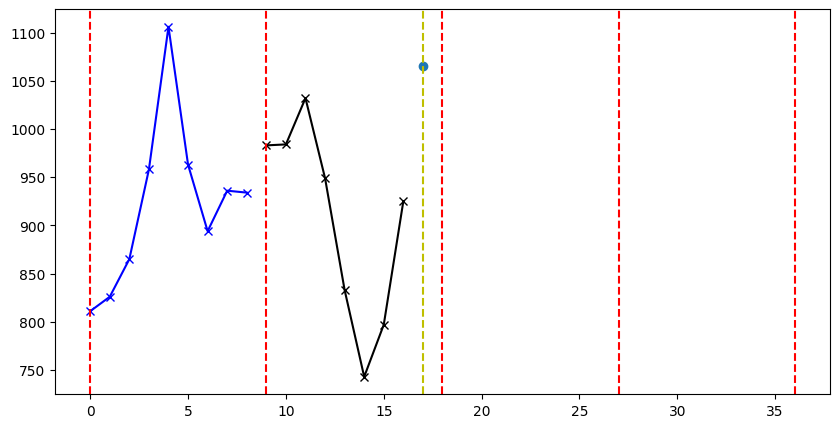

: 

In [37]:
import matplotlib.pyplot as plt
import numpy as np

x_train = np.load(r'D:\omer\ST-SSL\data\BJTaxi\train.npz')["x"]
y_train = np.load(r'D:\omer\ST-SSL\data\BJTaxi\train.npz')["y"]

# Preparing the data
in_train = x_train[:, -17:35, :, 0]
in_train_pred = y_train[:, :, :, 0]

# view1B = view1[:, :8, :, :]
# view1A = view1[:, 8:17, :, :]
# Plotting
plt.figure(figsize=(10, 5))  # Set figure size for better visibility
# Plot first 9 points in blue
node=375
sample = 370
plt.plot(in_train[sample, :9, node], "x-", color='blue')
# Plot last 8 points in black
plt.plot(range(9, 17), in_train[sample, 9:17, node], "x-", color='black')

# Plot prediction point with an 'o'
plt.plot(17, in_train_pred[sample, :, node], "o")

# Add vertical lines 9 samples apart and at index 17
for i in range(0, 37, 9):
    plt.axvline(x=i, color='r', linestyle='--')
plt.axvline(x=17, color='y', linestyle='--')

plt.show()


Get indices for masking

in_train.shape: (3814, 1024)


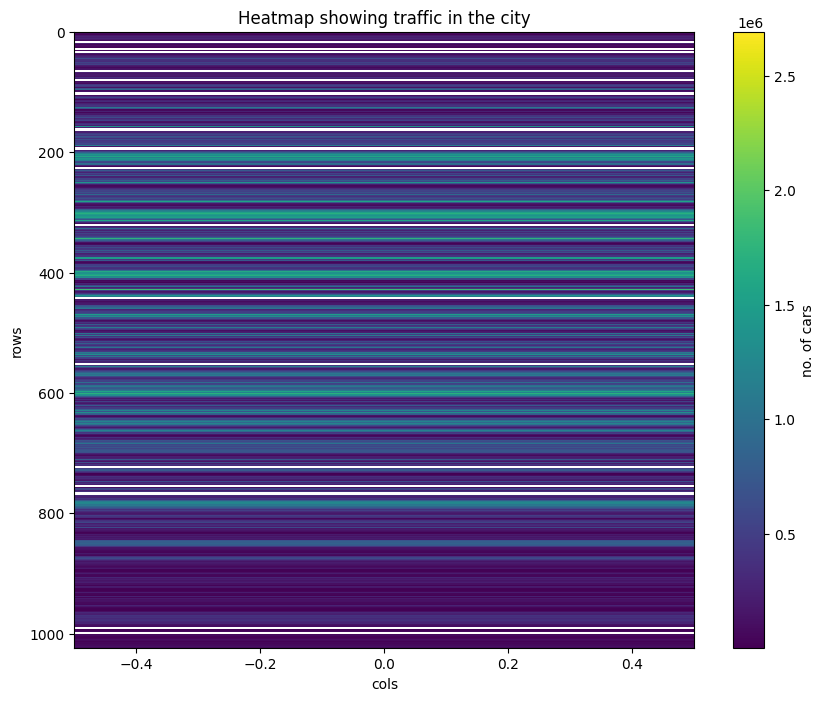

In [ ]:
import numpy as np
x_train = np.load(r'E:\estudy\ST-SSL\code\ST-SSL\data\BJTaxi\train.npz')["x"]
# y_train = np.load(r'E:\estudy\ST-SSL\code\ST-SSL\data\NYCTaxi\train.npz')["y"]
# print(f"len(data_train): {len(x_train)}")
# print(f"y_train.shape: {y_train.shape}")
in_train = x_train[:, 0, :, 0]
# out_train = x_train[:, :, :, 1]
print(f"in_train.shape: {in_train.shape}")
in_train_avg = np.sum(in_train, axis=0)
# out_train_avg = np.sum(out_train, axis=0).squeeze(0).reshape(20, 10)
# print(f"in_train_avg.shape: {in_train_avg.shape}")
in_train_avg[in_train_avg<1000] = -np.inf
# inout_train_avg = (in_train_avg + out_train_avg)/2
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.imshow(in_train_avg.reshape(-1, 1), cmap='viridis', aspect='auto')
plt.colorbar(label='no. of cars')
plt.title('Heatmap showing traffic in the city')
plt.xlabel('cols')
plt.ylabel('rows')
plt.show()

(200, 1)
[[ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 

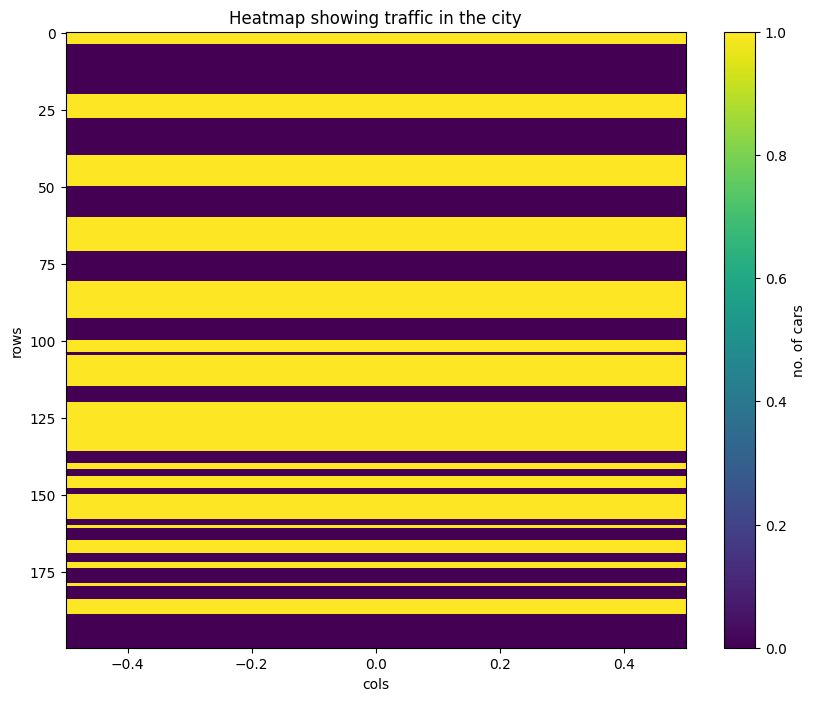

In [ ]:
indices = np.logical_not(in_train_avg<1000)
indices = indices.flatten().reshape(-1, 1)
# indices = np.tile(indices, (200, 1))
print(indices.shape)
print(indices)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.imshow(indices, cmap='viridis', aspect='auto')
plt.colorbar(label='no. of cars')
plt.title('Heatmap showing traffic in the city')
plt.xlabel('cols')
plt.ylabel('rows')
plt.show()

epoch
1      1.406766
2      1.188840
3      0.365174
4      0.111864
5      0.088629
         ...   
389    0.345269
390    0.345985
391    0.345904
392    0.344958
393    0.341009
Name: loss, Length: 393, dtype: float64


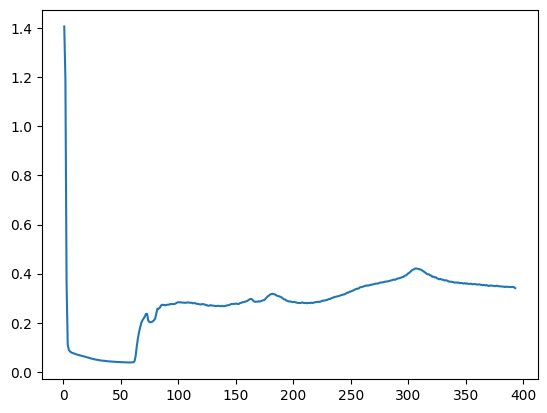

In [4]:
import pandas as pd

# Specify the file path of the CSV file
file_path =  r"D:\omer\ST-SSL\logs\BJTaxi_learnedPosEmbed\jepa-log.csv"

# Load the data from the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)


df = pd.DataFrame(df)
# print(sum(df['epoch']==1))
# Group by 'Epoch' and calculate the mean of 'Loss'
average_loss = df.groupby('epoch')['loss'].mean()
grouped = df.groupby('epoch')
groups = grouped.groups
# print(groups)
print(average_loss)
# same_epoch_df = df.loc[df['epoch'] == str(1)]
# print(same_epoch_df.head(160))
import matplotlib.pyplot as plt
plt.plot(average_loss)

In [3]:
import numpy as np
x_train = np.load(r'E:\estudy\ST-SSL\code\ST-SSL\data\BJTaxi\train.npz')["x"]
# y_train = np.load(r'E:\estudy\ST-SSL\code\ST-SSL\data\NYCTaxi\train.npz')["y"]
# print(f"len(data_train): {len(x_train)}")
# print(f"y_train.shape: {y_train.shape}")
in_train = x_train[:, 0, :, 0]
# out_train = x_train[:, :, :, 1]
print(f"in_train.shape: {in_train.shape}")
in_train_avg = np.sum(in_train, axis=0)
# out_train_avg = np.sum(out_train, axis=0).squeeze(0).reshape(20, 10)
# print(f"in_train_avg.shape: {in_train_avg.shape}")
in_train_avg[in_train_avg<1000] = -np.inf
# inout_train_avg = (in_train_avg + out_train_avg)/2
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.imshow(in_train_avg.reshape(-1, 1), cmap='viridis', aspect='auto')
plt.colorbar(label='no. of cars')
plt.title('Heatmap showing traffic in the city')
plt.xlabel('cols')
plt.ylabel('rows')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\estudy\\ST-SSL\\code\\ST-SSL\\data\\BJTaxi\\train.npz'